# <center> Playing with Pokemon on Seaborn
</center>

Table of Contents

- Pokemon Stat and Categorical Distributions
- Top Pokemon per Element Type

In [289]:
# Importing Libraries
%matplotlib inline

import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

from pylab import rcParams

# Set plotting format
#plt.rcParams['figure.figsize'] = (30,20)
%config InlineBackend.figure_format = 'retina'

# Disable notebook warnings
warnings.filterwarnings('ignore')


# Setting Dataframe format
pd.set_option('display.max_columns',1000)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
pd.set_option('precision',2)
sns.set()

In [290]:
# Pokemon color palette
pkmn_type_colors = ['#A8B820',  # Bug
                    '#23272c',  # Dark
                    '#7038F8',  # Dragon
                    '#F8D030',  # Electric
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F08030',  # Fire
                    '#04E4B1',  # Flying
                    '#705898',  # Ghost
                    '#78C850',  # Grass
                    '#E0C068',  # Ground
                    '#98D8D8',  # Ice
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#b0c4de',  # Steel
                    '#0096FF',  # Water    
                  ]

### Importing Data

In [291]:
# Importing dataset
p = pd.DataFrame(pd.read_csv('data/Pokemon.csv'))
p.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Pokemon Stat and Categorical Distributions

In [292]:
# Understanding the upper and lower bounds of the numeric data
p.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,362.8,435.1,69.3,79.0,73.8,72.8,71.9,68.3,3.3
std,208.3,120.0,25.5,32.5,31.2,32.7,27.8,29.1,1.7
min,1.0,180.0,1.0,5.0,5.0,10.0,20.0,5.0,1.0
25%,184.8,330.0,50.0,55.0,50.0,49.8,50.0,45.0,2.0
50%,364.5,450.0,65.0,75.0,70.0,65.0,70.0,65.0,3.0
75%,539.2,515.0,80.0,100.0,90.0,95.0,90.0,90.0,5.0
max,721.0,780.0,255.0,190.0,230.0,194.0,230.0,180.0,6.0


In [293]:
# viewing the unique categorical values of the pokemon types
ptype = pd.Series(p['Type 1'].value_counts()  + p['Type 2'].value_counts())
ptype = pd.DataFrame(data=ptype, columns = ['Total'])
ptype.index.rename('Type', inplace=True)
ptype.head()

,Total
Type,
Bug,72
Dark,51
Dragon,50
Electric,50
Fairy,40


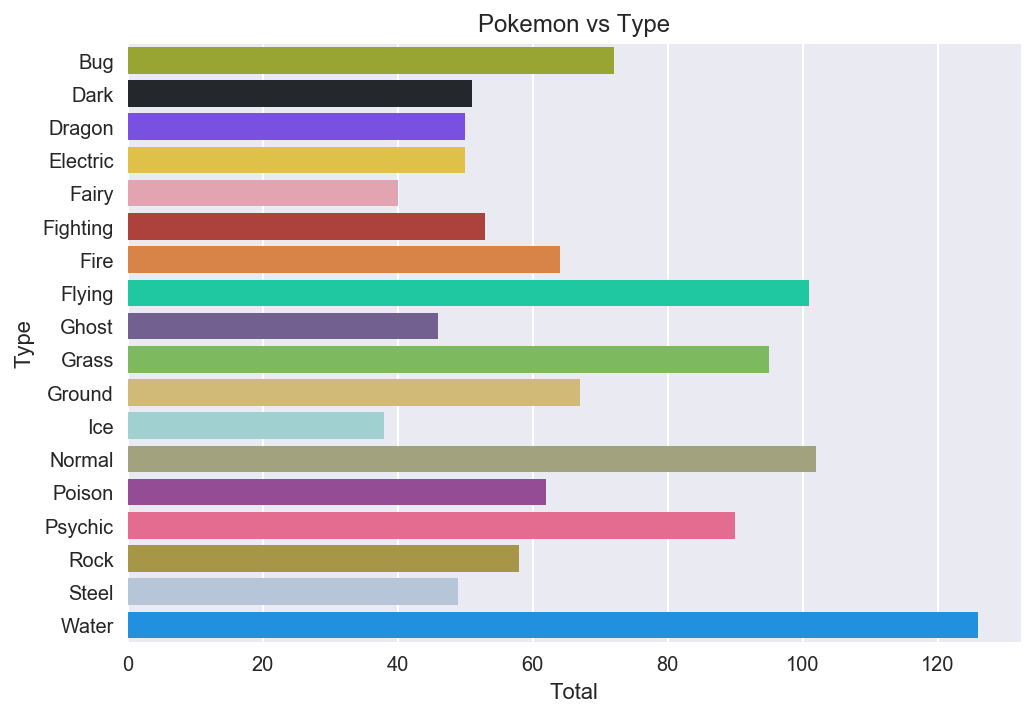

In [294]:
# Barplot: Pokemon by Type (including dual Types)
sns.barplot(x=ptype.Total, y=ptype.index, palette= pkmn_type_colors)
plt.title('Pokemon vs Type')
plt.xlabel('Total')

In [295]:
# Count the number of generation in pokemon dataset
p.Generation.unique().max()

6

In [296]:
# Pokemon in each Generations
pgen = pd.Series(p.Generation.value_counts(), name='Total')
pgen = pd.DataFrame(data=pgen, columns=['Total'])
pgen.set_index([['Gen 1','Gen 2','Gen 3','Gen 4','Gen 5','Gen 6']], inplace=True)
pgen

,Total
Gen 1,166
Gen 2,165
Gen 3,160
Gen 4,121
Gen 5,106
Gen 6,82


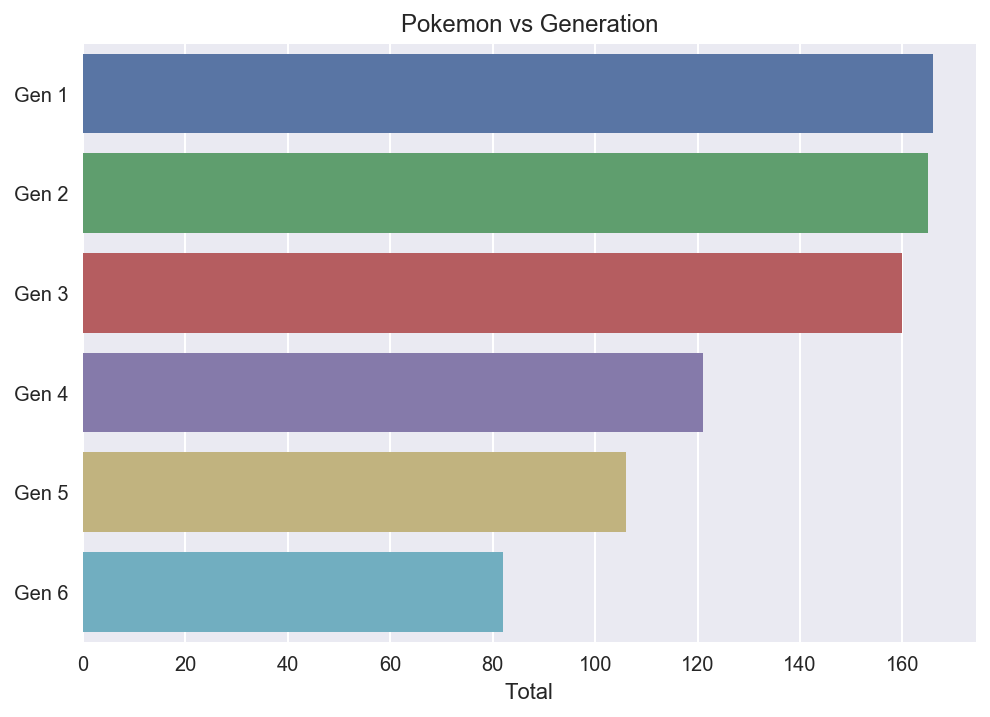

In [297]:
# Barplot: Pokemon by generation
sns.barplot(x=pgen.Total, y=pgen.index)
plt.title('Pokemon vs Generation')
plt.xlabel('Total')

In [298]:
# Viewing dataframe that lists only legendary pokemon
p[p.Legendary == True]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


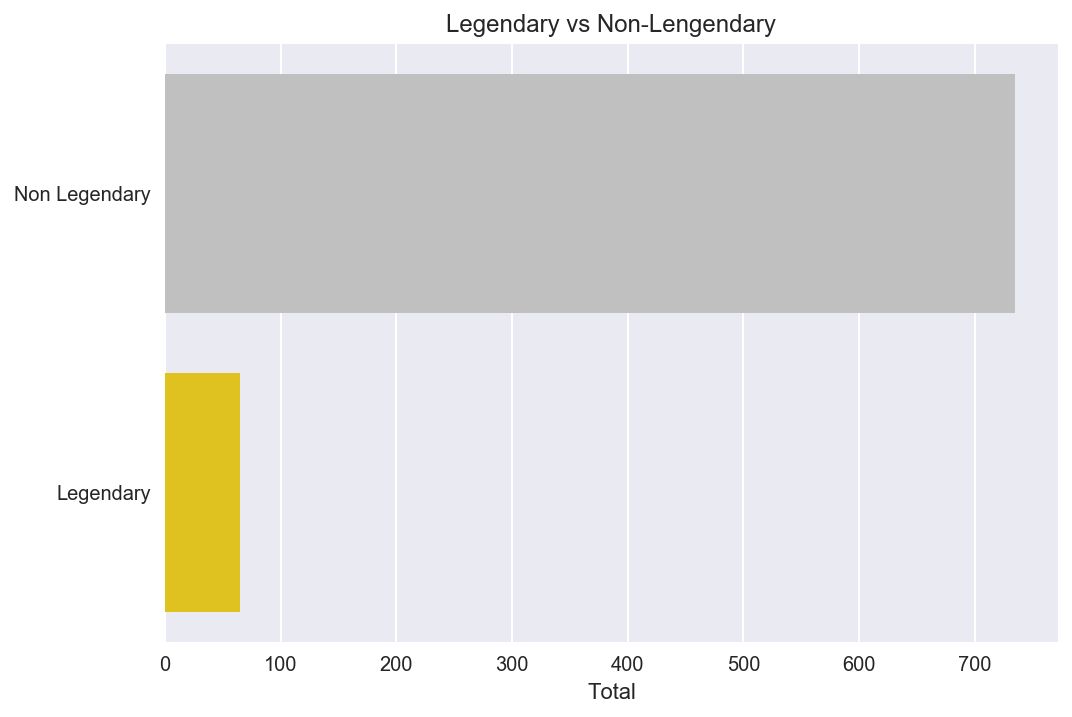

In [299]:
# DataFrame of legendary vs non-lengendary pokemon
pleg = pd.DataFrame(pd.Series(p.Legendary.value_counts(), name='Total'))
pleg.set_index([['Non Legendary', 'Legendary']],inplace=True)

# Plotting comparison of ledendary vs non-legendary pokemon
sns.barplot(x=pleg.Total, y=pleg.index, palette=['Silver','Gold'])
plt.title('Legendary vs Non-Lengendary')
plt.xlabel('Total')

In [300]:
# creating list of simliar distribution of feature for plotting
pstats = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
pstats_NoTotal = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']

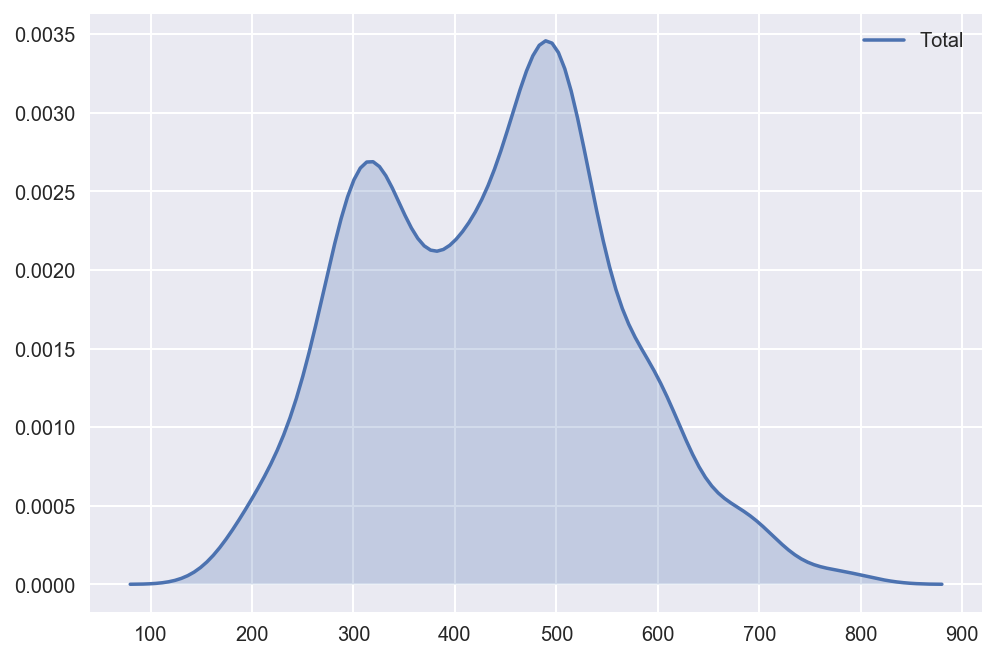

In [301]:
# Plotting Total HP via Kernel Density Plot
sns.kdeplot(p['Total'], shade=True)

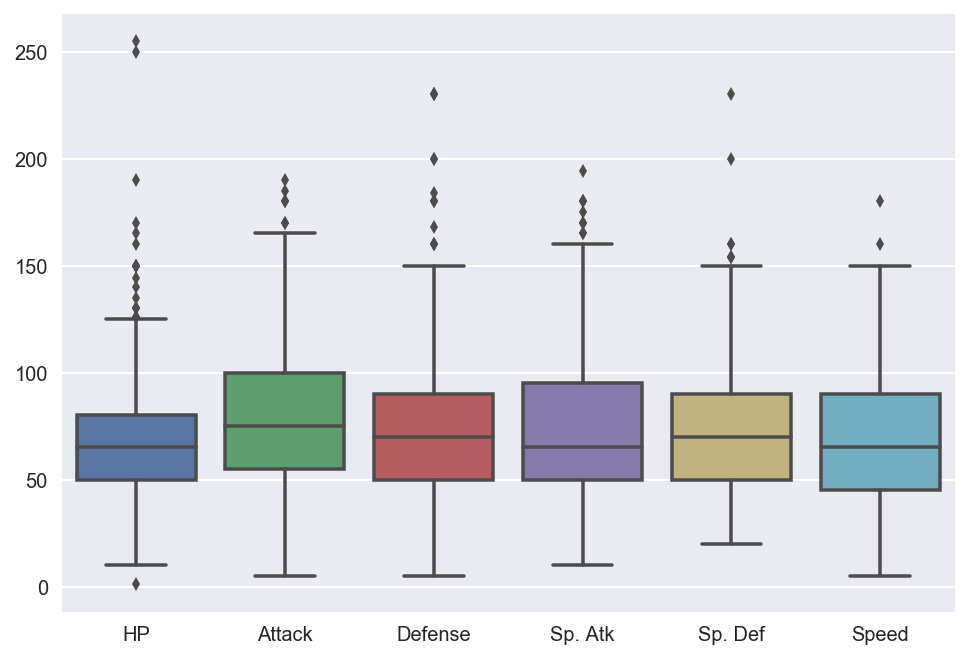

In [302]:
# Comparing pokemon stat distributions
sns.boxplot(data=p[pstats_NoTotal])

In [325]:
ptype = p['Type 1'].unique()

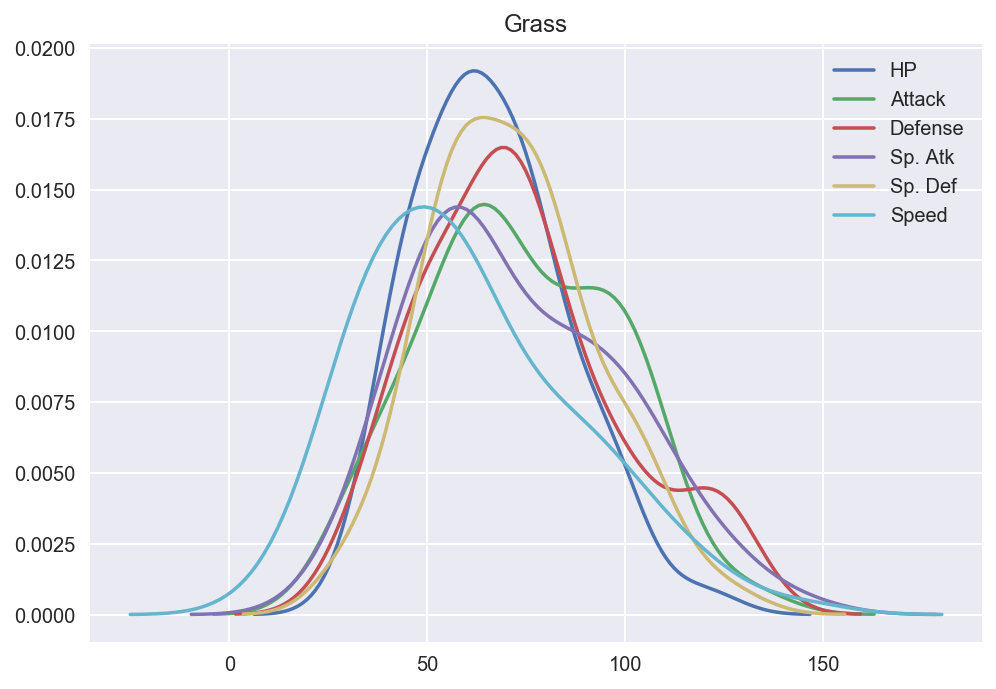

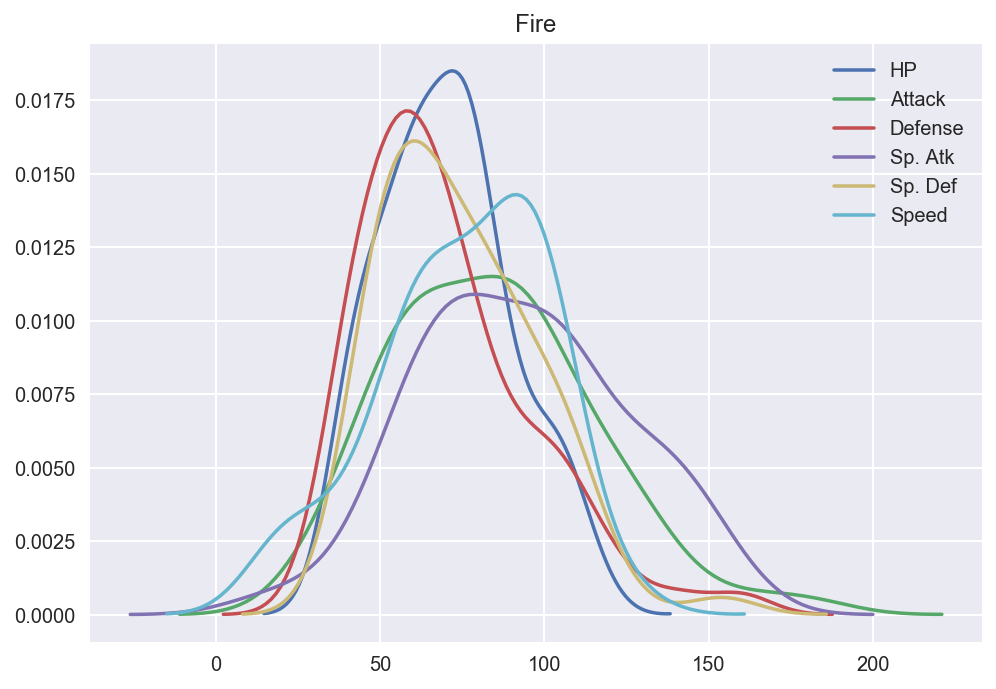

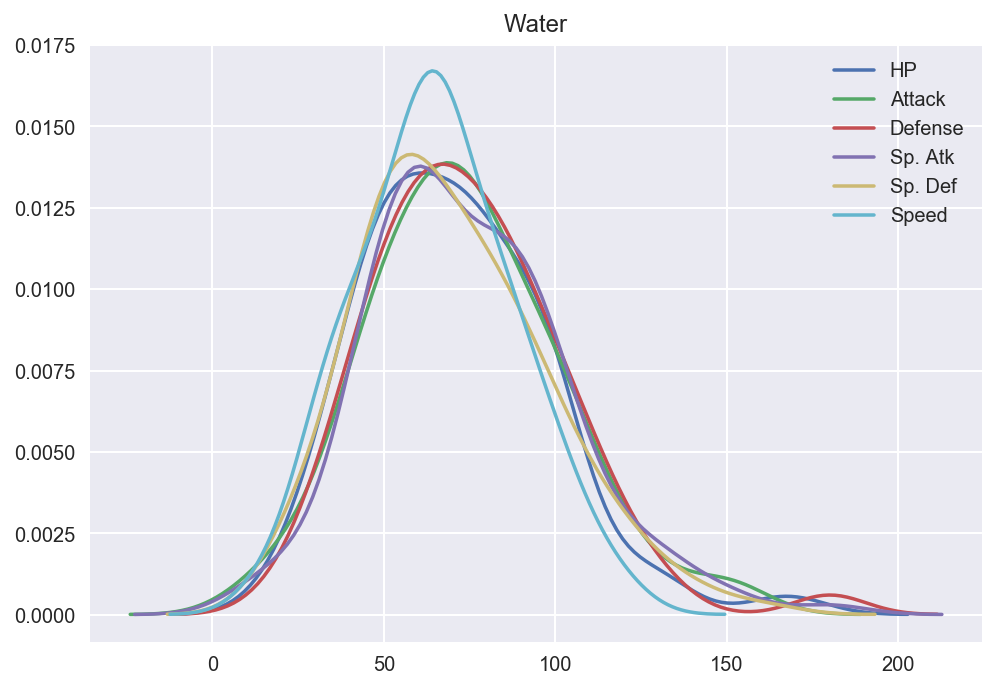

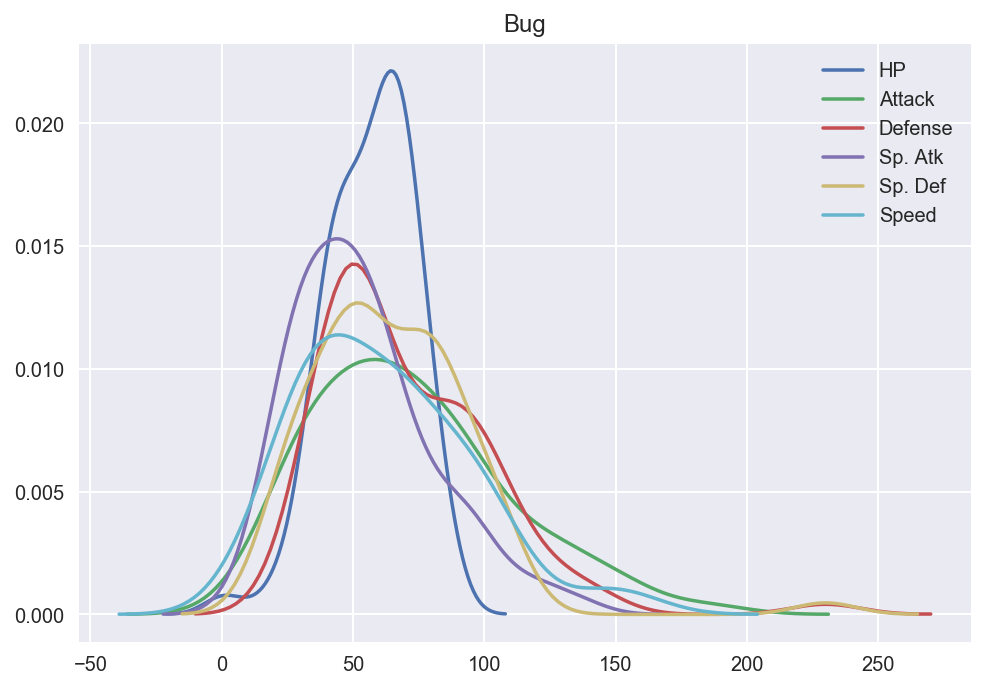

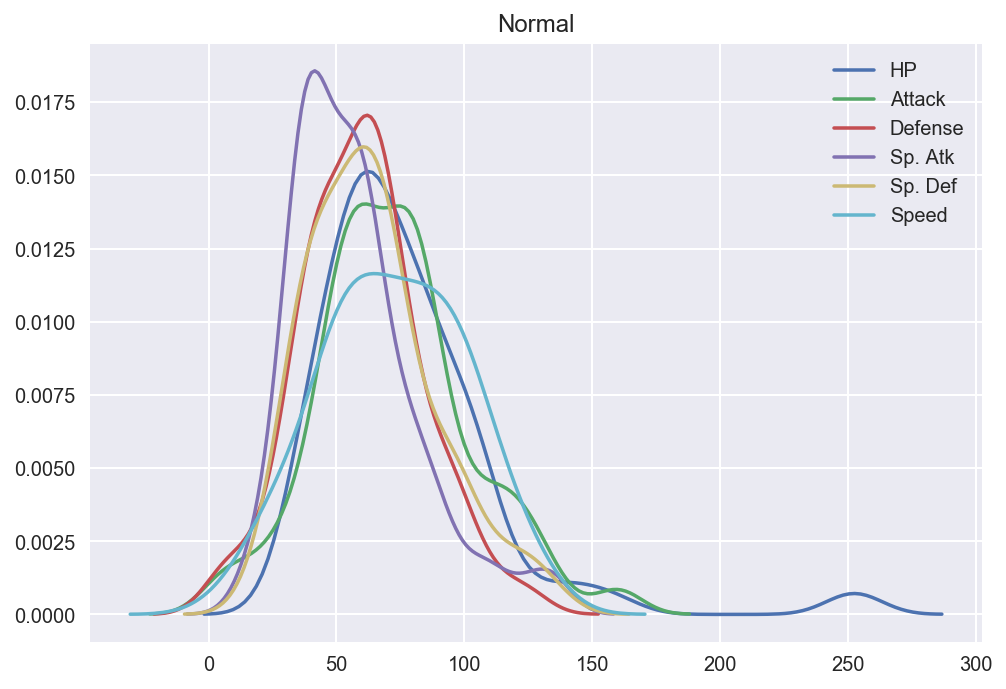

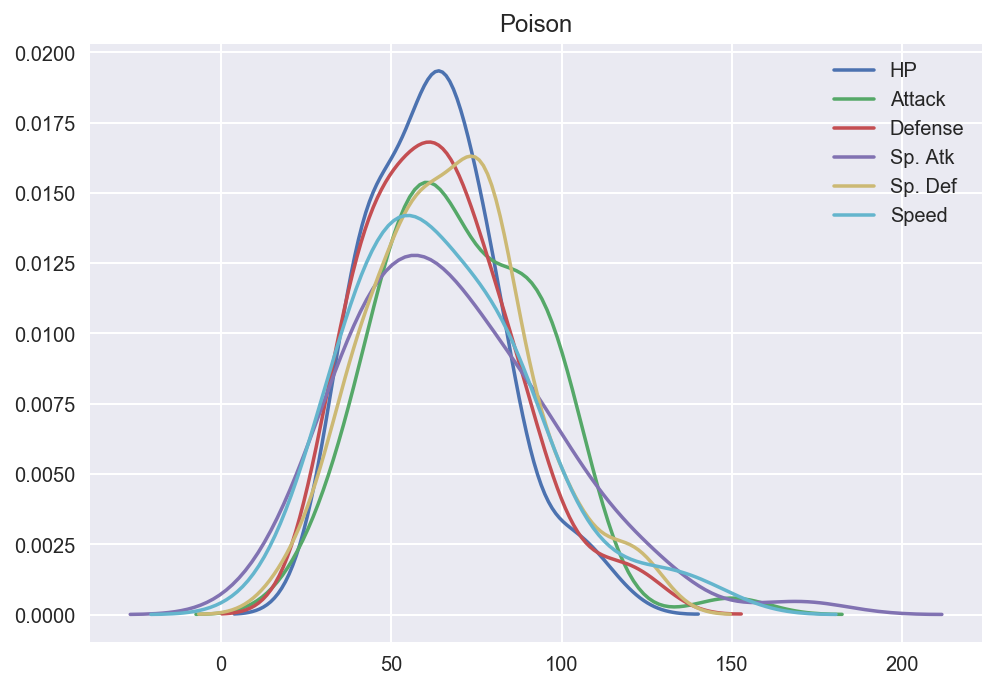

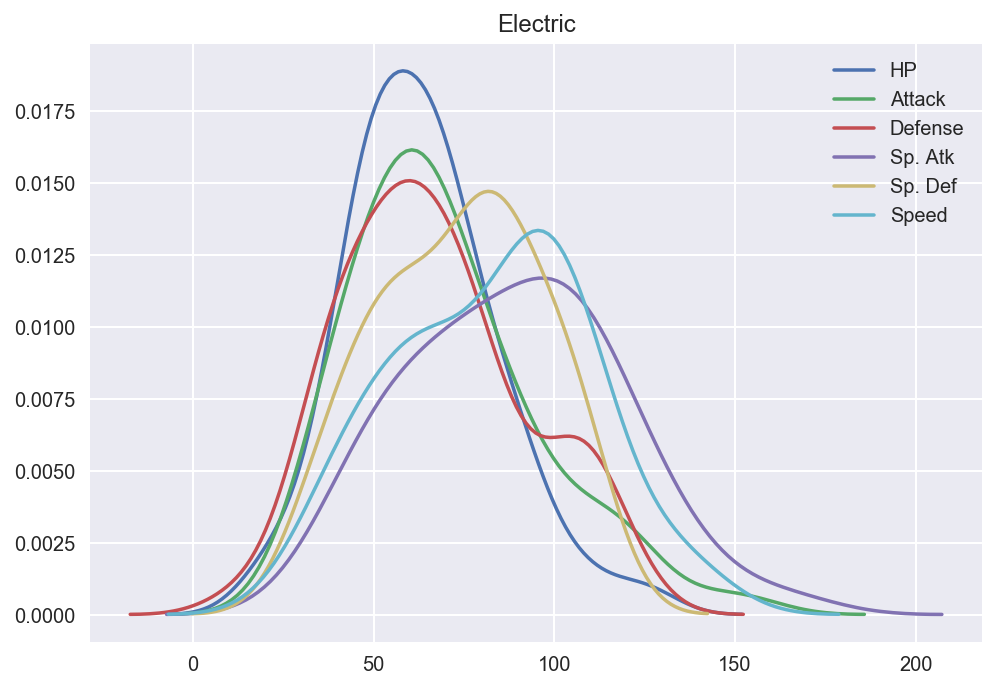

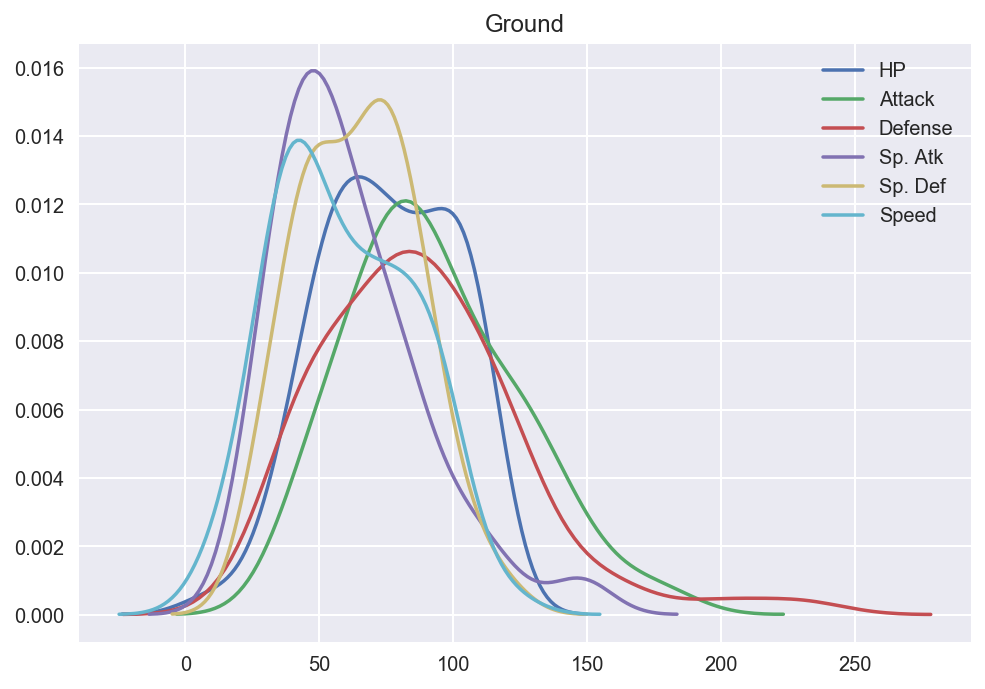

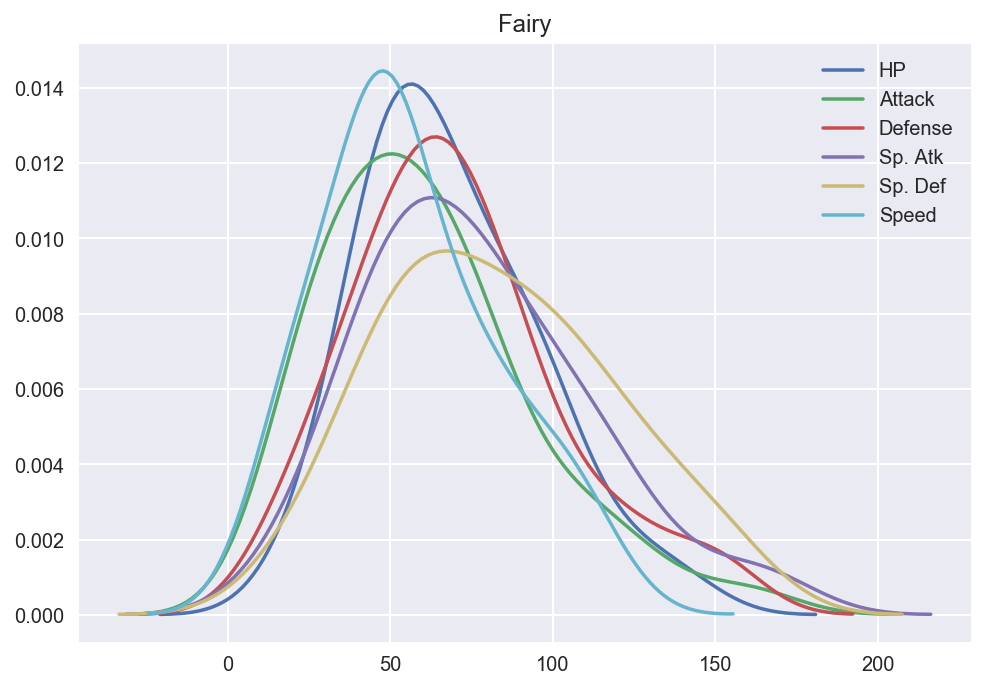

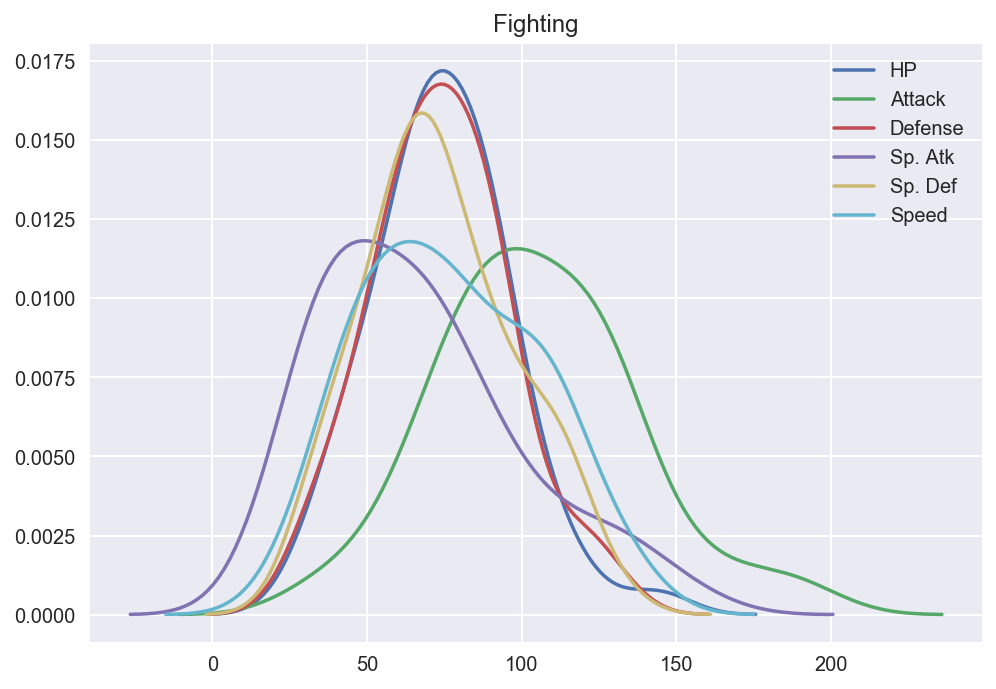

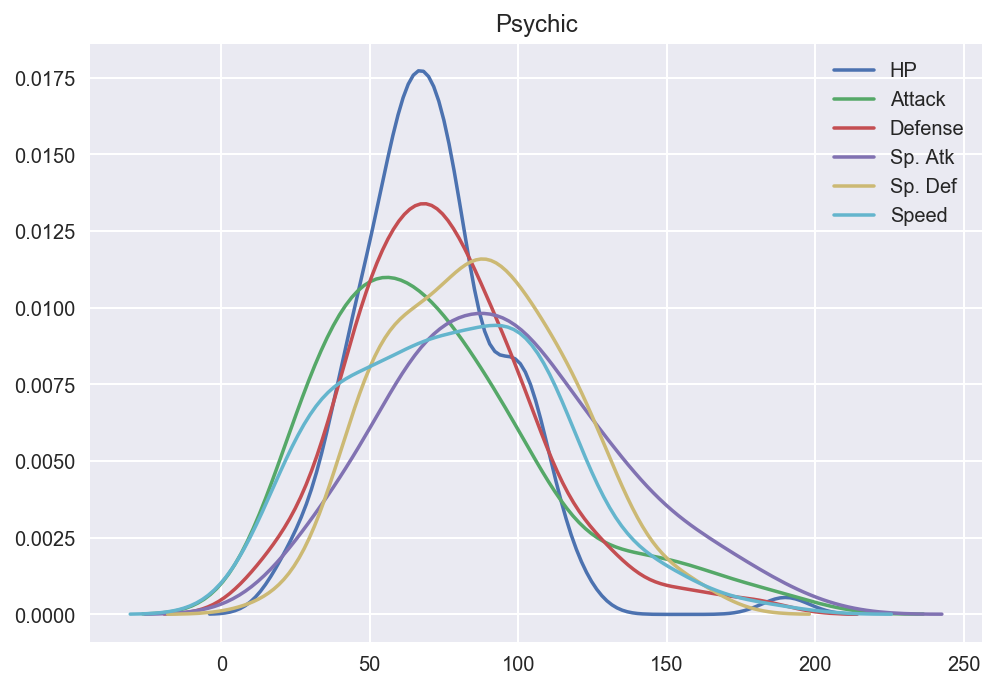

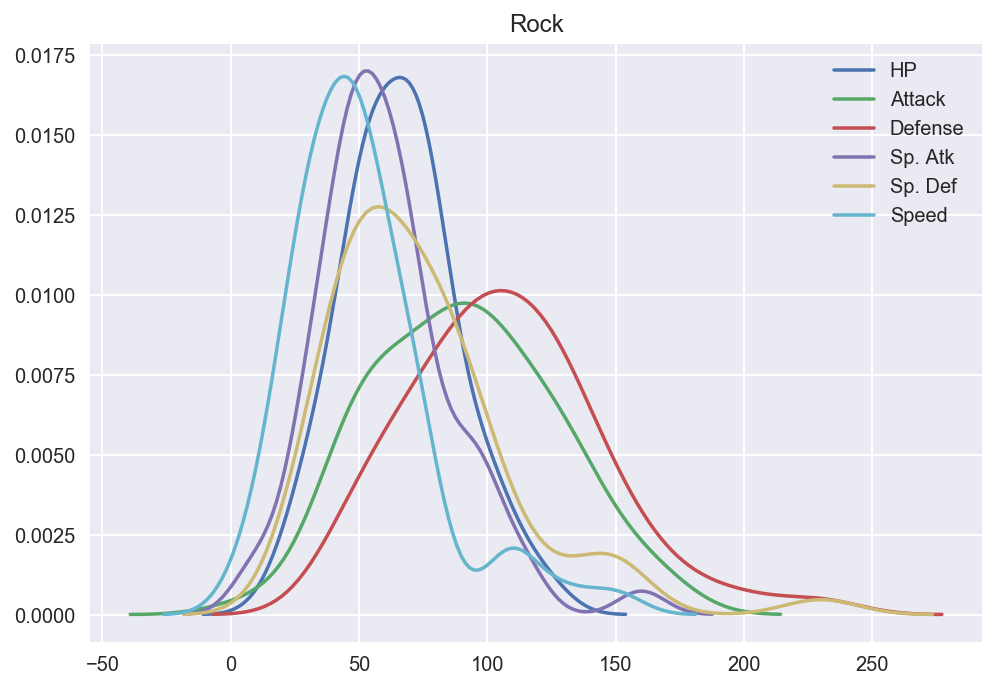

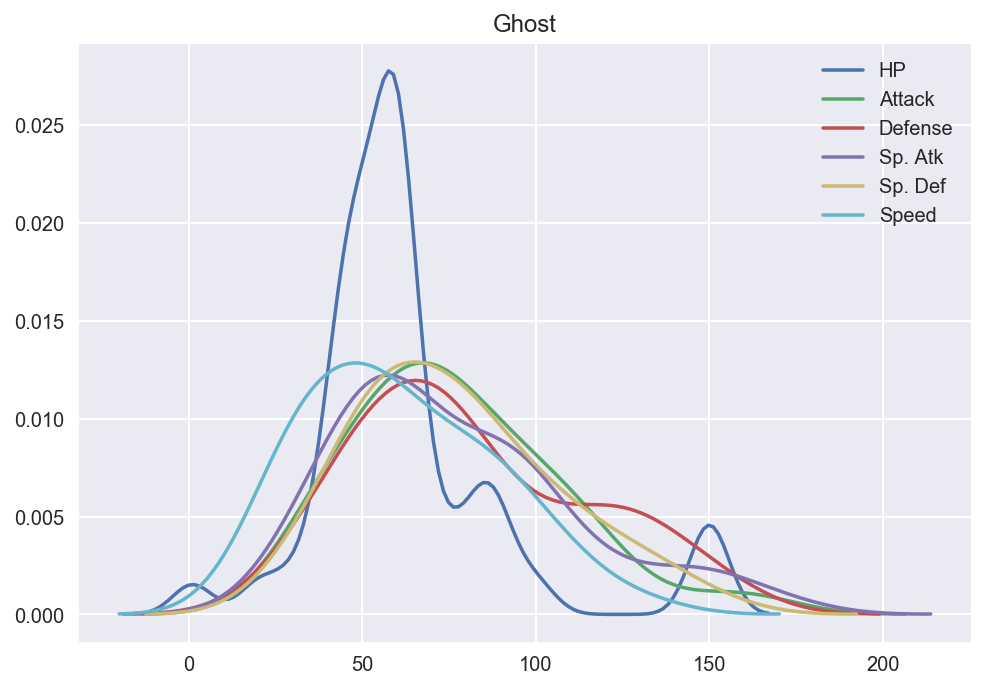

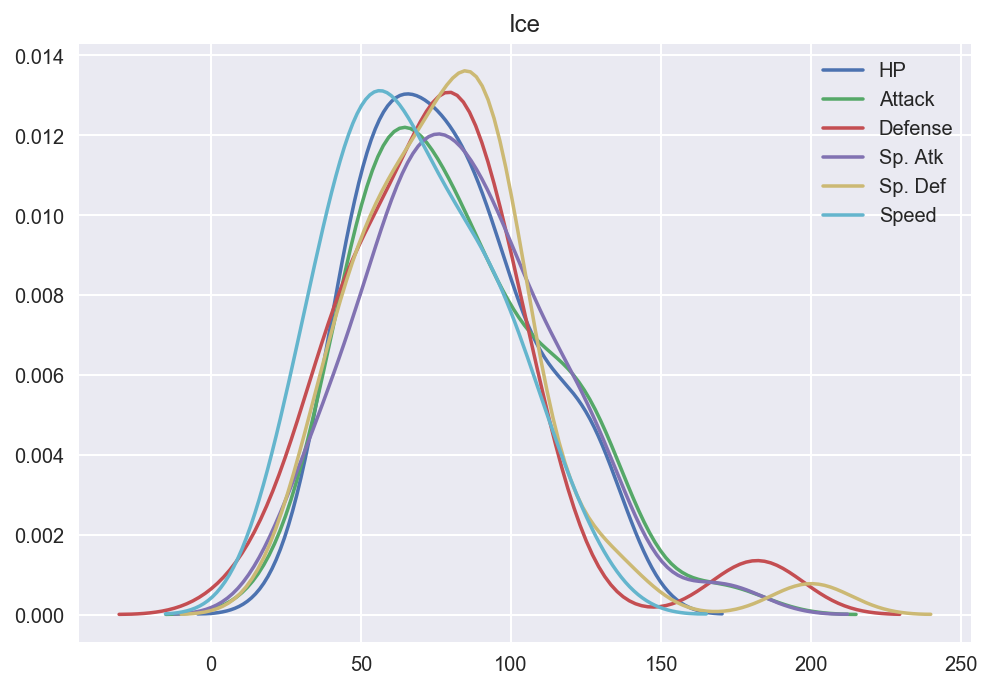

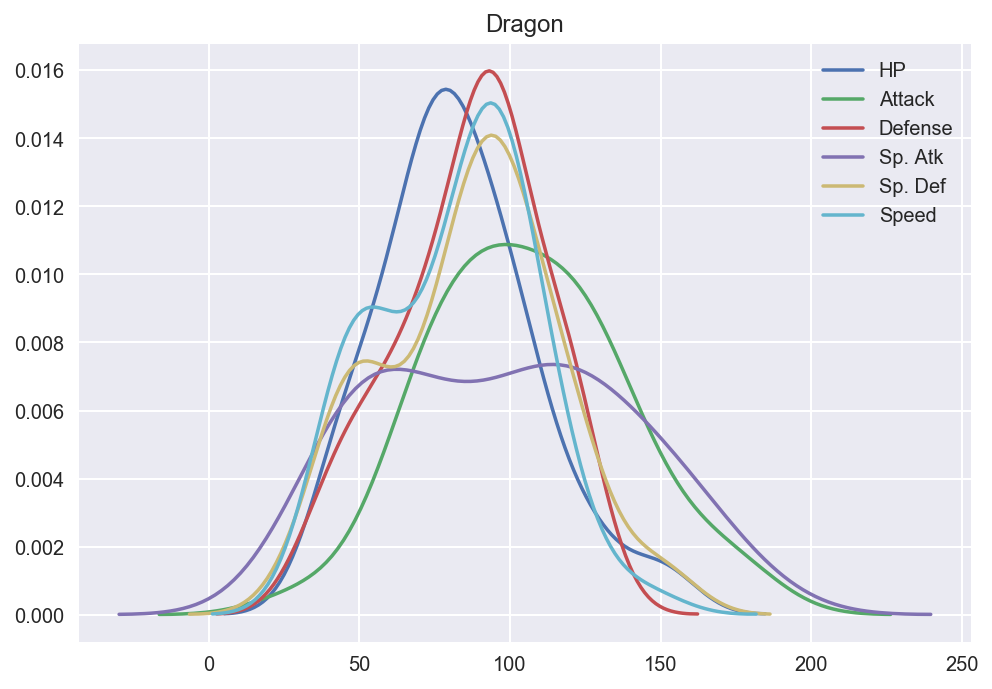

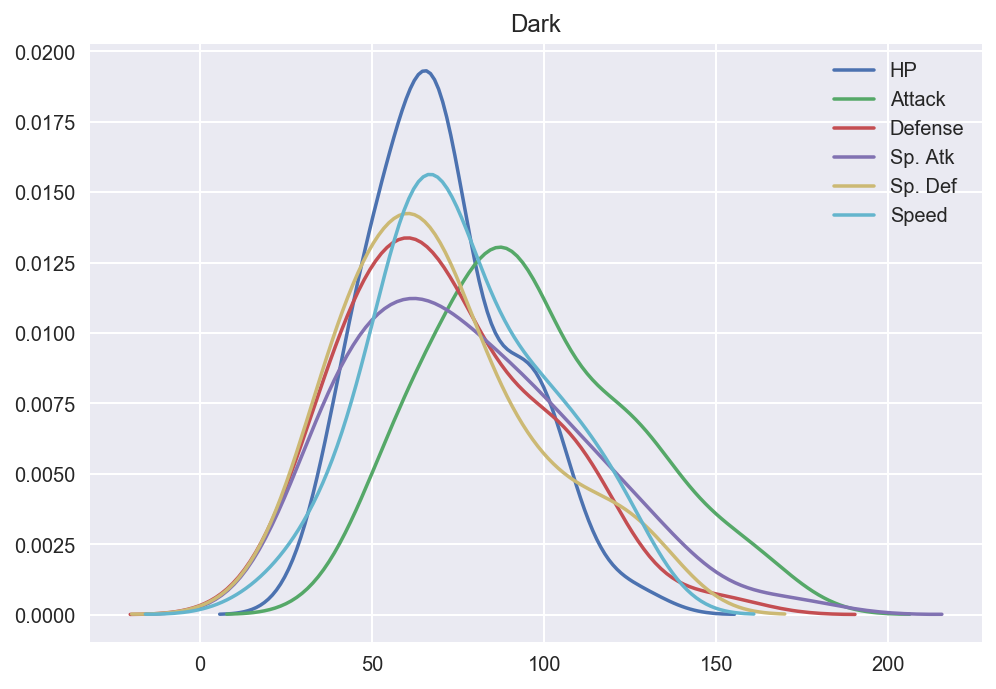

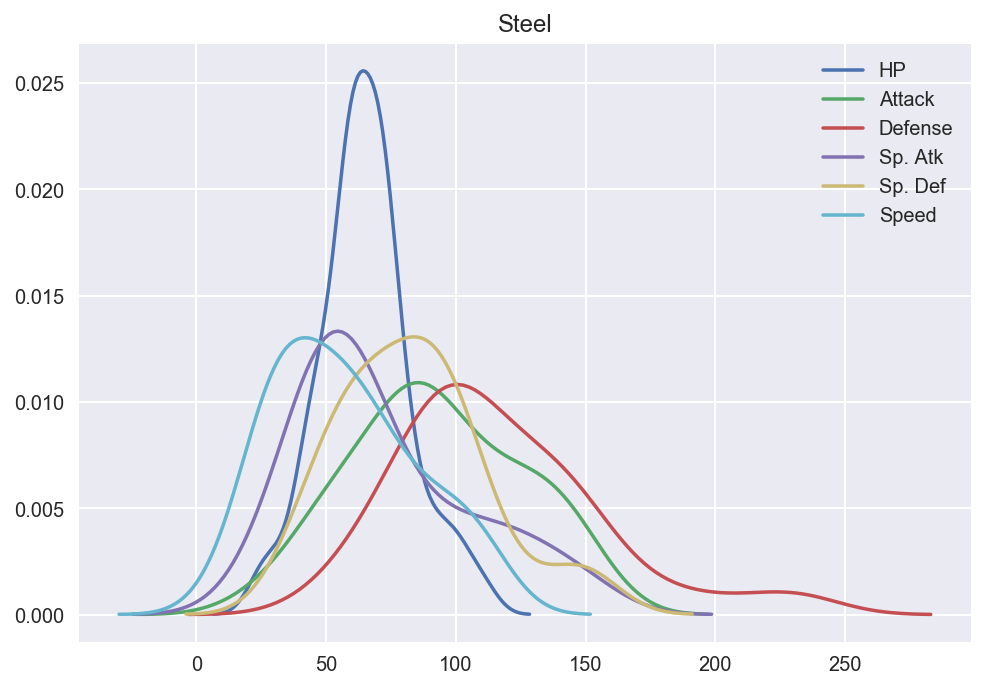

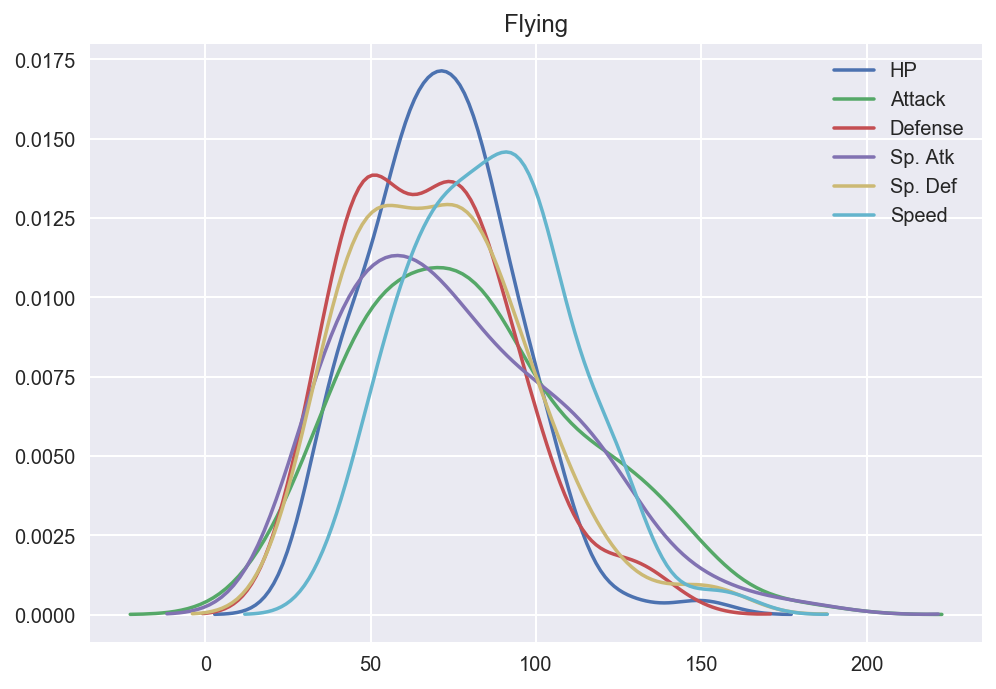

In [338]:
# Understanding the plot distributions of each pokemont type
    plt.figure()
    for j in pstats_NoTotal:
        sns.kdeplot(data=p[j][(p['Type 1'] == i) | (p['Type 2'] == i)])
    plt.title(i)

### The Top Pokemon per Type

In [376]:
ptype = p['Type 1'].unique()

In [377]:
# Your go to pokemon if you can get them
for i in ptype:
    print('Pokemon Type: ' + str(i))
    df = pd.DataFrame(p[(p['Type 1'] == i ) | (p['Type 2'] == i)][['Name', 'Total']])
    print(df[df['Total'] == df['Total'].max()])
    print('\n\n\n')


Pokemon Type: Grass
                      Name  Total
275  SceptileMega Sceptile    630




Pokemon Type: Fire
                      Name  Total
424  GroudonPrimal Groudon    770




Pokemon Type: Water
                    Name  Total
422  KyogrePrimal Kyogre    770




Pokemon Type: Bug
                        Name  Total
137        PinsirMega Pinsir    600
229        ScizorMega Scizor    600
232  HeracrossMega Heracross    600
717                 Genesect    600




Pokemon Type: Normal
       Name  Total
552  Arceus    720




Pokemon Type: Poison
                    Name  Total
3  VenusaurMega Venusaur    625




Pokemon Type: Electric
       Name  Total
707  Zekrom    680




Pokemon Type: Ground
                      Name  Total
424  GroudonPrimal Groudon    770




Pokemon Type: Fairy
                    Name  Total
796  DiancieMega Diancie    700




Pokemon Type: Fighting
                    Name  Total
163  MewtwoMega Mewtwo X    780




Pokemon Type: Psychic
                

In [378]:
# Now lets look at the best pokemon after removing legendary pokemon
for i in ptype:
    print('Pokemon Type: ' + str(i))
    df = pd.DataFrame(p[((p['Type 1'] == i ) | (p['Type 2'] == i))&(p['Legendary'] == False)][['Name', 'Total']])
    print(df[df['Total'] == df['Total'].max()])
    print('\n')

Pokemon Type: Grass
                      Name  Total
275  SceptileMega Sceptile    630


Pokemon Type: Fire
                        Name  Total
7  CharizardMega Charizard X    634
8  CharizardMega Charizard Y    634


Pokemon Type: Water
                      Name  Total
141  GyaradosMega Gyarados    640


Pokemon Type: Bug
                        Name  Total
137        PinsirMega Pinsir    600
229        ScizorMega Scizor    600
232  HeracrossMega Heracross    600
717                 Genesect    600


Pokemon Type: Normal
        Name  Total
313  Slaking    670


Pokemon Type: Poison
                    Name  Total
3  VenusaurMega Venusaur    625


Pokemon Type: Electric
                      Name  Total
196  AmpharosMega Ampharos    610


Pokemon Type: Ground
                      Name  Total
494  GarchompMega Garchomp    700


Pokemon Type: Fairy
                        Name  Total
306  GardevoirMega Gardevoir    618


Pokemon Type: Fighting
                      Name  Total
279  B